In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

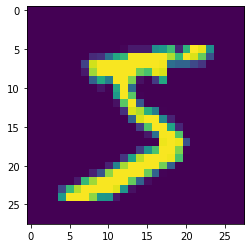

In [5]:
single_image = x_train[0]
plt.imshow(single_image)

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
 y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
y_example = to_categorical(y_train)

In [11]:
y_example.shape

(60000, 10)

In [12]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
scaled_image.max()

1.0

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
#batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [24]:
x_test = x_test.reshape(10000,28,28,1)

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [28]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#output_layer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [32]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2914 - accuracy: 0.9136 - val_loss: 0.0565 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0380 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0367 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0394 - val_accuracy: 0.9872


In [33]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.138298,0.959067,0.056457,0.9807
1,0.048600,0.984783,0.037961,0.9868
2,0.029827,0.990517,0.036694,0.9870
3,0.021289,0.993033,0.039358,0.9872


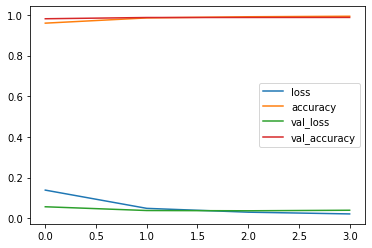

In [36]:
metrics.plot()

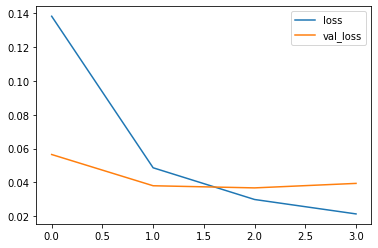

In [37]:
metrics[['loss','val_loss']].plot()

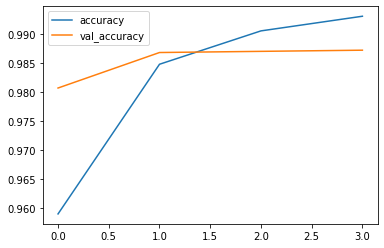

In [38]:
metrics[['accuracy','val_accuracy']].plot()

In [39]:
model.metrics_names

['loss', 'accuracy']

In [41]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.03935831040143967, 0.9872000217437744]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [47]:
y_cat_test.shape

(10000, 10)

In [48]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [50]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1132,    2,    0,    0,    0,    0,    0,    1,    0],
       [   5,    3, 1013,    0,    0,    0,    1,    5,    5,    0],
       [   0,    0,    1, 1004,    0,    0,    0,    2,    3,    0],
       [   0,    1,    0,    0,  974,    0,    3,    0,    0,    4],
       [   2,    0,    0,   12,    0,  867,    8,    0,    3,    0],
       [   3,    2,    0,    0,    1,    1,  951,    0,    0,    0],
       [   0,    5,    5,    0,    2,    0,    0, 1012,    2,    2],
       [   6,    1,    4,    0,    0,    0,    3,    3,  954,    3],
       [   1,    3,    1,    2,    3,    1,    0,    8,    2,  988]])

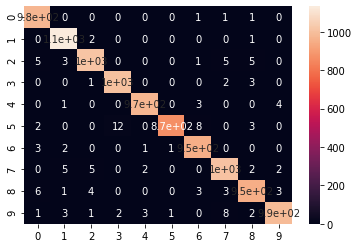

In [51]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [52]:
my_number = x_test[0]

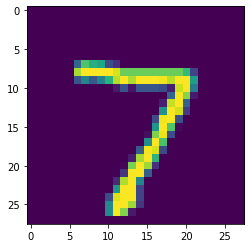

In [54]:
plt.imshow(my_number.reshape(28,28))

In [66]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)))

7

In [68]:
model.save('Keras_MNIST_Data.h5')